MOUNT DRIVE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

Data Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits and veg dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits and veg dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3116 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


Building CNN Model

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 677ms/step - accuracy: 0.0328 - loss: 26.7764 - val_accuracy: 0.0285 - val_loss: 3.5829
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 642ms/step - accuracy: 0.0382 - loss: 3.5775 - val_accuracy: 0.0399 - val_loss: 3.5777
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 654ms/step - accuracy: 0.0466 - loss: 3.5403 - val_accuracy: 0.0883 - val_loss: 3.4386
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 652ms/step - accuracy: 0.0605 - loss: 3.4599 - val_accuracy: 0.1254 - val_loss: 3.3614
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 637ms/step - accuracy: 0.0764 - loss: 3.3348 - val_accuracy: 0.1681 - val_loss: 3.1470
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 620ms/step - accuracy: 0.0918 - loss: 3.2032 - val_accuracy: 0.2365 - val_loss: 2.9137
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 651ms/step - accuracy: 0.1238 - loss: 3.0919 - val_accuracy: 0.3048 - val_loss: 2.7425
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 624ms/step - accuracy: 0.1542 - loss: 2.9488 - val_acc

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 544ms/step - accuracy: 0.8414 - loss: 0.5842
Training accuracy: 0.8501283526420593


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 698ms/step - accuracy: 0.8449 - loss: 0.7265
Validation accuracy: 0.8632478713989258


In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.028241334483027458,
  0.03979460895061493,
  0.049101412296295166,
  0.0593709871172905,
  0.07830552011728287,
  0.10077022016048431,
  0.12869063019752502,
  0.15596918761730194,
  0.18356867134571075,
  0.23299100995063782,
  0.26957637071609497,
  0.321566104888916,
  0.36103978753089905,
  0.40179717540740967,
  0.44576379656791687,
  0.46598201990127563,
  0.4971116781234741,
  0.5301668643951416,
  0.5378690361976624,
  0.5750962495803833,
  0.5917843580245972,
  0.5994865298271179,
  0.6415275931358337,
  0.6582156419754028,
  0.6578947305679321,
  0.676508367061615,
  0.7044287323951721,
  0.7233632802963257,
  0.7188703417778015,
  0.7439024448394775,
  0.7596276998519897,
  0.7718228697776794],
 'loss': [9.460601806640625,
  3.574748992919922,
  3.5198099613189697,
  3.446890115737915,
  3.320730686187744,
  3.1934492588043213,
  3.0918447971343994,
  2.961733341217041,
  2.8585193157196045,
  2.7096123695373535,
  2.5579018592834473,
  2.400261163711548,
  2

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 86.32478713989258 %


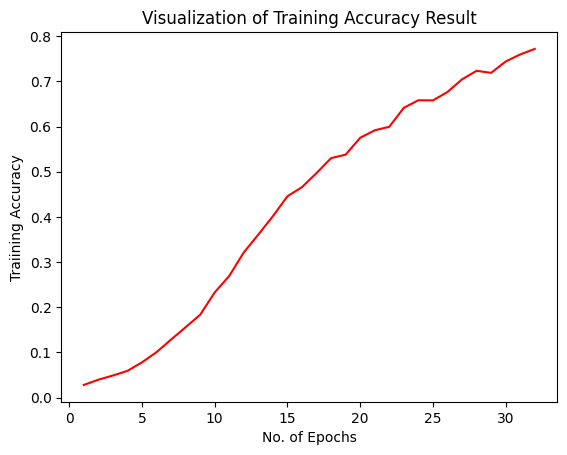

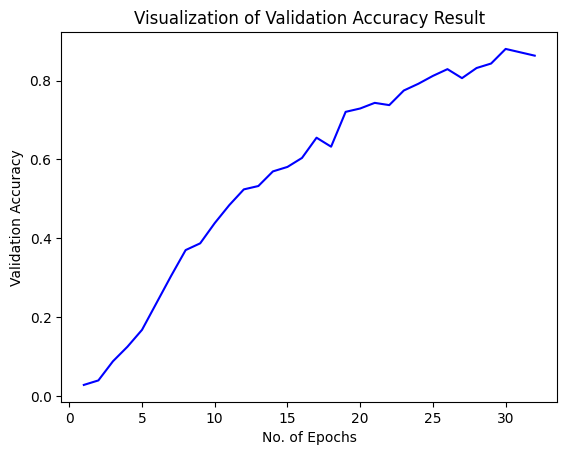

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruits and veg dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 783ms/step - accuracy: 0.8744 - loss: 0.5875
Test accuracy: 0.8579387068748474


Image prediction on test set

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')


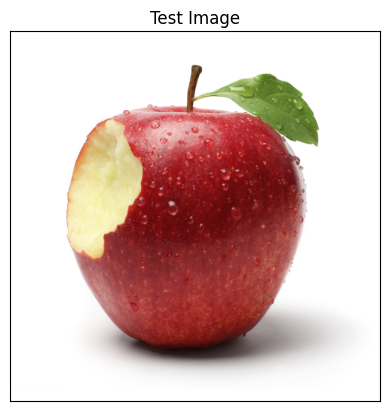

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/fruits and veg dataset/test/apple/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


In [ ]:
print(predictions)

[[9.9894553e-01 3.2694611e-08 9.6634994e-06 2.4280450e-06 1.8191113e-08
  5.5007455e-05 2.5134508e-05 1.6520161e-08 2.2530899e-07 4.4224414e-08
  4.7313924e-12 2.5547671e-08 2.1007208e-08 8.6362098e-11 1.5352450e-07
  2.8422221e-07 2.8192242e-09 6.8871926e-09 1.3989699e-09 2.5053992e-06
  6.2290223e-06 2.1604831e-06 9.2093012e-04 1.5681891e-09 7.9613278e-12
  3.3790531e-08 1.4622388e-05 5.4272136e-06 4.1769176e-06 1.3158756e-06
  3.9249264e-11 2.5624679e-08 1.2143889e-06 1.1504470e-06 5.9194417e-07
  1.0366941e-06]]


0


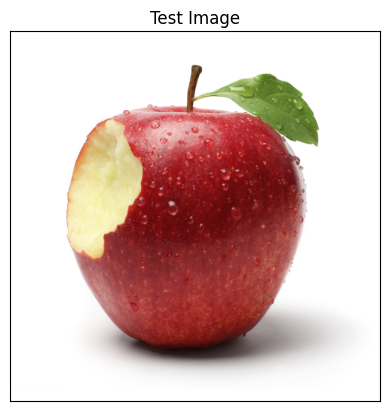

It's a apple


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

print("It's a {}".format(test_set.class_names[result_index]))
